This summarises what is found in Lesson 4 of the Stats501 in Penn State University's Regression Methods Course

This lesson deals with SLR's Model Assumption.

https://newonlinecourses.science.psu.edu/stat501/node/275/

There are four conditions that comprise "the simple linear regression model", which can spell out **LINE**

- The mean of the response, $E(Y_i)$, at each value of the predictor $x_i$, is a **L**inear function of the $x_i$.
- The errors, $\epsilon_i$ are **I**ndependent.
- The errors, $\epsilon_i$, at each value of the predictor $x_i$, are **N**ormally distributed.
- The errors, $\epsilon_i$, at each value of the predictor $x_i$, have **E**qual variances (denoted $\sigma^2$).

We thus need to challenge these assumptions when we do up a SLR model for a given dataset. We may need to reevaluate the model if these conditions are not met.

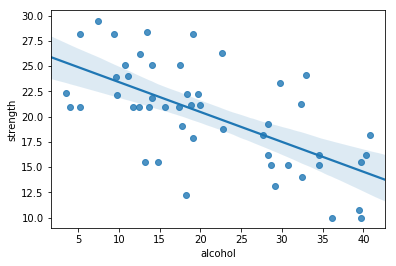

In [15]:
from scipy.stats import t
from sklearn.model_selection import train_test_split

data = pd.read_csv('alcoholarm.csv')
data = data.sample(frac=1).reset_index(drop=True)
sns.regplot(data.alcohol, data.strength)
plt.show()

**Residuals vs True Error**

Residuals - the vertical difference between $y_i$ and $\hat{y}_i$

$e_i = y_i-\hat{y}_i$

True Error - Each observed residuals is thought of as the estaimate of the 
actual unknown "true error".

$\epsilon_i = Y_i-E(Y_i)$

**Residuals versus fits plot**

A scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

To do this, the y-axis needs to be the residual, and the x-axis would be the $\hat{y}$ values.

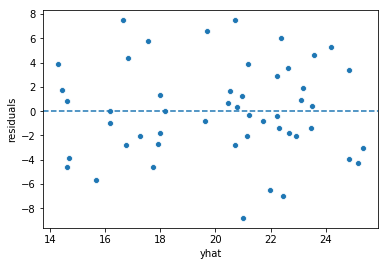

In [16]:
# we've done SLR on statsmodels many times. 

def get_yhat_resi(x, y, data):
    X = sm.add_constant(x)
    result = sm.OLS(y, X).fit()
    result.summary()
    data['yhat'] = result.predict(X)
    data['residuals'] = y - data.yhat
    sns.scatterplot(data.yhat, data.residuals)
    plt.axhline(0, 0, max(data.yhat) + 1, linestyle = '--')
    plt.show()
    
get_yhat_resi(data.alcohol, data.strength, data)

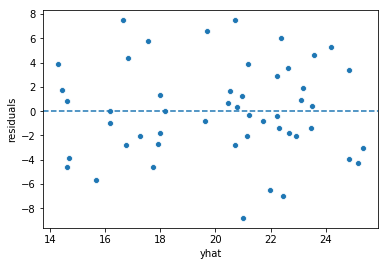

In [17]:
# use seaborn to make such a chart
sns.scatterplot(data.yhat, data.residuals)
plt.axhline(0, 0,max(data.yhat) + 1, linestyle = '--')
plt.show()

Well-behaved Residuals - 
- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.


**Residuals versus predictor plot**

A scatter plot of residuals on the y axis and predictor values (x values) on the x axis. 

For a simple linear regression model, if the predictor on the x axis is the same predictor that is used in the regression model, the residuals vs. predictor plot offers no new information to that which is already learned by the residuals vs. fits plot. On the other hand, if the predictor on the x axis is a new and different predictor, the residuals vs. predictor plot can help to determine whether the predictor should be added to the model (and hence a multiple regression model used instead).

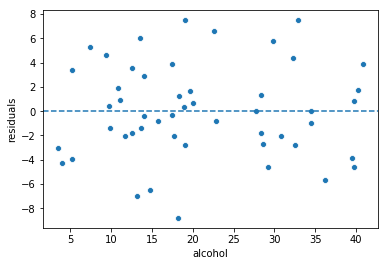

In [18]:
# use seaborn to make such a chart
# use alcohol as the predictor 
sns.scatterplot(data.alcohol, data.residuals)
plt.axhline(0, 0,max(data.yhat) + 1, linestyle = '--')
plt.show()

If the realation between predictor and response values are a linear one, then the residuals to predictor plot should not offer anything new.

As plots, these are subjective.

## Identifying problems in our SLR model using Residual Plots

**Identifying a non-linear regression function**

We can use a residuals versus fits plots to identify if the relation between x and y is linear or not.


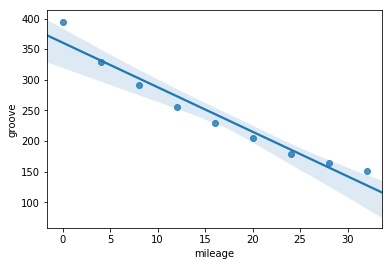

In [19]:
data = pd.read_csv('treadwear.csv')
data = data.sample(frac=1).reset_index(drop=True)
sns.regplot(data.mileage, data.groove)
plt.show()

In [20]:
X = sm.add_constant(data.mileage)
result = sm.OLS(data.groove, X).fit()
print (result.summary())
data['yhat'] = result.predict(X)
data['residuals'] =  data.groove - data.yhat

                            OLS Regression Results                            
Dep. Variable:                 groove   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.7
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           6.87e-06
Time:                        12:29:04   Log-Likelihood:                -38.148
No. Observations:                   9   AIC:                             80.30
Df Residuals:                       7   BIC:                             80.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.6367     11.689     30.854      0.0

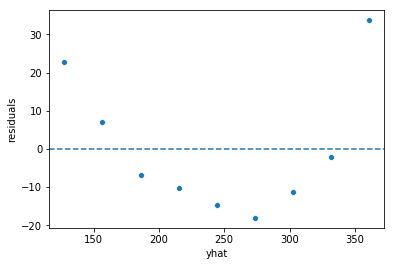

In [21]:
sns.scatterplot(data.yhat, data.residuals)
plt.axhline(0, 0, max(data.yhat) + 1, linestyle = '--')
plt.show()

Two things stand out - 

1. It is very clear that the residuals depart from 0 in a very systematic way. It looks like this is a non-linear relation.
2. The $r^2$ value is 0.953 but the relation is non-linear. It is in this case that we can question the assumptions of the model.

**Non-constant error variance in residual vs fits plot**


What is error variance?

Error is the difference in value between the $\hat{y}$ and $y_i$. The variance of error values should follow a normal distribution with the mean close to zero. If the disribution is not normal, then the error variance is not constant. 

Non-constant error variance shows up on a residuals vs. fits (or predictor) plot in any of the following ways:

- The plot has a "fanning" effect. That is, the residuals are close to 0 for small x values and are more spread out for large x values.
- The plot has a "funneling" effect. That is, the residuals are spread out for small x values and close to 0 for large x values.
- Or, the spread of the residuals in the residuals vs. fits plot varies in some complex fashion.

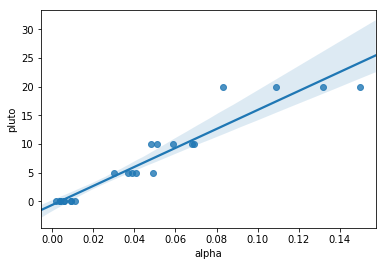

In [22]:
data = pd.read_csv('alphapluto.csv')
data = data.sample(frac=1).reset_index(drop=True)
sns.regplot(data.alpha, data.pluto)
plt.show()

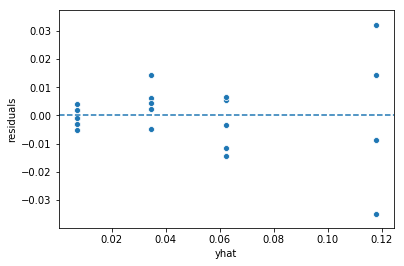

In [23]:
get_yhat_resi(data.pluto, data.alpha, data)

Note that the residuals "fan out" from left to right rather than exhibiting a consistent spread around the residual = 0 line. The residual vs. fits plot suggests that the error variances are not equal.

## Residual vs Order Plots 

It is a scatter plot with residuals on the y axis and the order in which the data were collected on the x axis. 

**A time trend**

Consider the following residuals vs order plots - 

<img src="timetrend.jpg"/>

This suggests that some of the variation in the response is due to time. Therefore, it might be a good idea to add the predictor "time" to the model. That is, you interpret this plot just as you would interpret any other residual vs. predictor plot. It's just that here your predictor is "time."


**Positive Serial Correlation**



<img src="PositiveCorr.jpg"/>

**Negative Serial Correlation**
<img src="NegativeCorr.gif"/>


Negative serial correlation exists when residuals of one sign tend to be followed, in time, by residuals of the opposite sign.



**Normal Probability Plot of Residuals**

This plot will assess the "N" condition of SLR modelling. That is, the model's error terms are normally distributed.


This is waht a normally distributed residuals plot will look like.

<img src="NormDist.jpg"/>

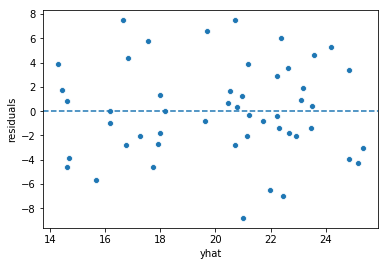

In [24]:
data = pd.read_csv('alcoholarm.csv')
data = data.sample(frac=1).reset_index(drop=True)
get_yhat_resi(data.alcohol, data.strength, data)

Now we will construct a frequency plot based on the alcohol to arm strength data used earlier.

Again, it is easier to use a seaborn, with distplot. 

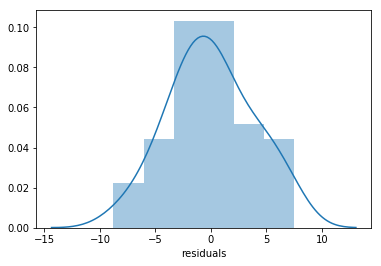

In [26]:
sns.distplot(data['residuals'])
plt.show()

The frequency of residuals is normally distrubuted. Thus this linear model's assumption for "N" is met.

Normal residuals but with one outlier

<img src="NormResiOneOutlier.jpg"/>

Skewerd Residuals: 

<img src="SkewedResi.jpg"/>

Heavy Tailed Residuals:

<img src="HeavyTailedResi.jpg"/>
